- Transformacja dyskretna Fouriera, y=Fx (DFT) O(n^2), mozna szybciej uzywajac  implementacji FFT O(nlogn)
- odwrotna x=F^(-1)y, (IDFT),
- twierdzenie o splocie (do mnozenia  m.in dwoch wielomianow),
- obracamy obraz o 90 st zeby z twierdxenia o splocie przejsc do tw o korelacji

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from numpy.fft import fft2, ifft2
from numpy import rot90
from numpy import multiply, amax

In [2]:
class PatternResult:
	def __init__(self, correlation, gray_image, angles, absolute_value):
		self.correlation = correlation
		self.gray_image = gray_image
		self.angles = angles
		self.absolute_value = absolute_value


In [3]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [4]:
def find_pattern(input_file='data/Lab9_galia.png', pattern="data/Lab9_galia_e.png"):
	img = mpimg.imread(input_file)
	gray = rgb2gray(img)
	gray /= np.max(gray)
	galia = 1 - gray

	DFT = fft2(galia)

	angles = np.angle(DFT)
	absolute = np.absolute(DFT)

	e_img = mpimg.imread(pattern)
	e_gray = rgb2gray(e_img)
	e_gray = 1 - e_gray

	C = np.real(ifft2(np.multiply(fft2(galia), fft2(rot90(e_gray, 2), s=galia.shape))))

	C /= np.max(C)

	return PatternResult(C, gray, angles, absolute)

In [5]:
pres1 = find_pattern(input_file='data/Lab9_galia.png', pattern="data/Lab9_galia_e.png")

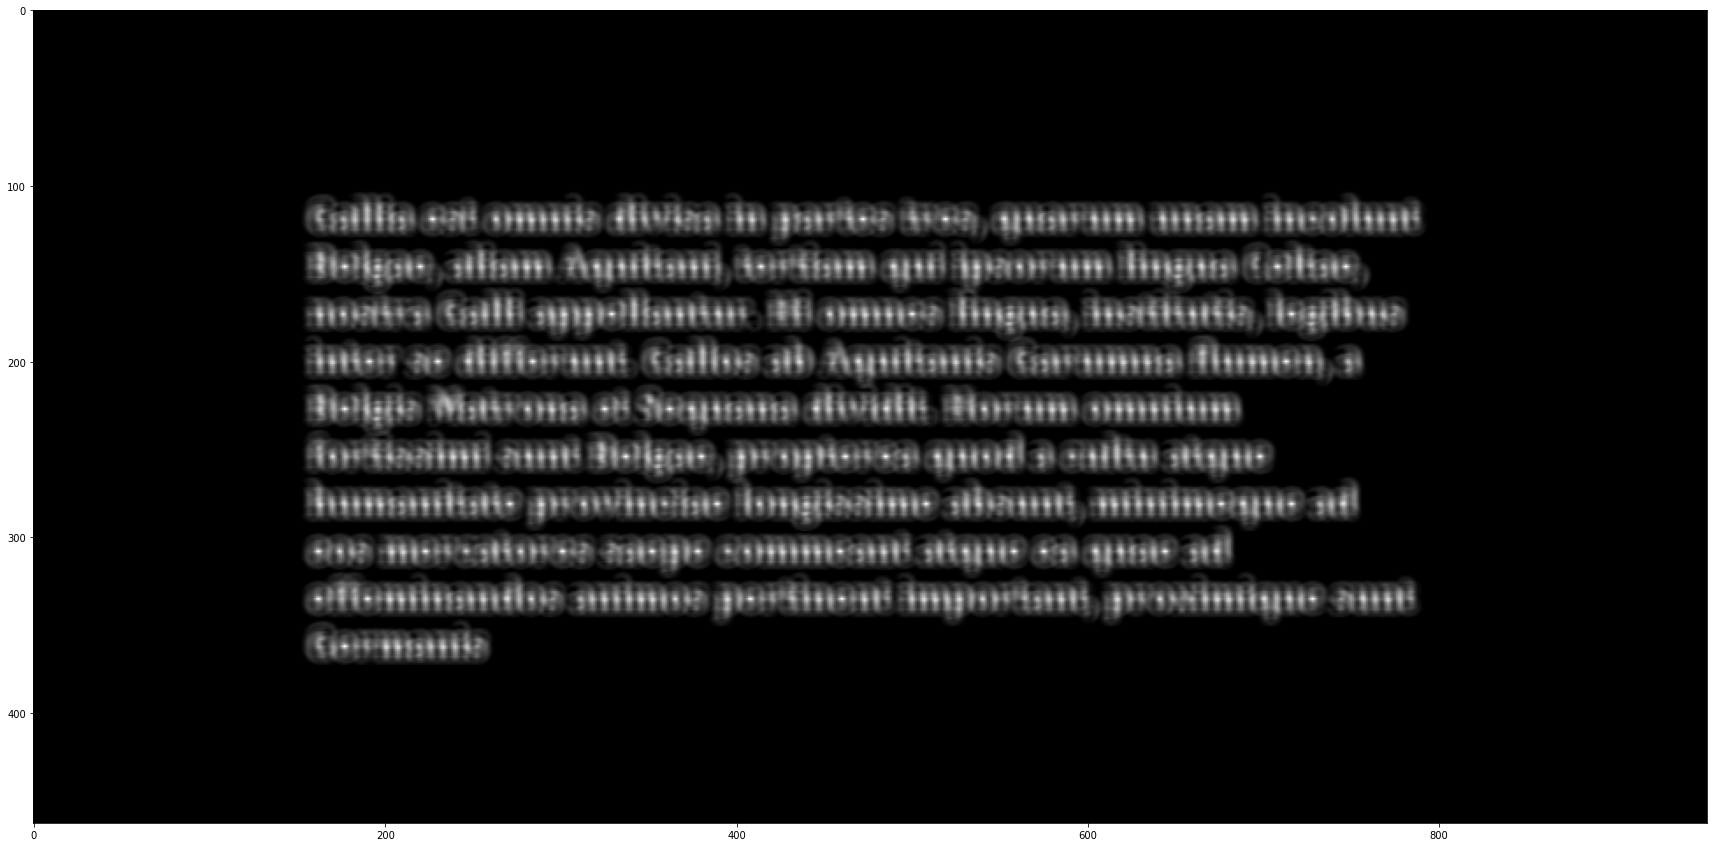

In [6]:
fig, ax = plt.subplots(figsize=(30, 30))
ax.imshow(pres1.correlation, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()

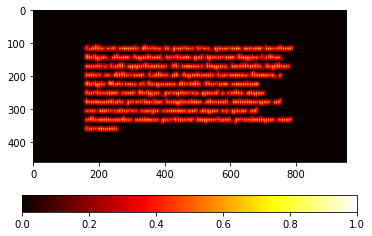

In [7]:
im = plt.imshow(pres1.correlation, cmap='hot')
plt.colorbar(im, orientation='horizontal')
plt.show()

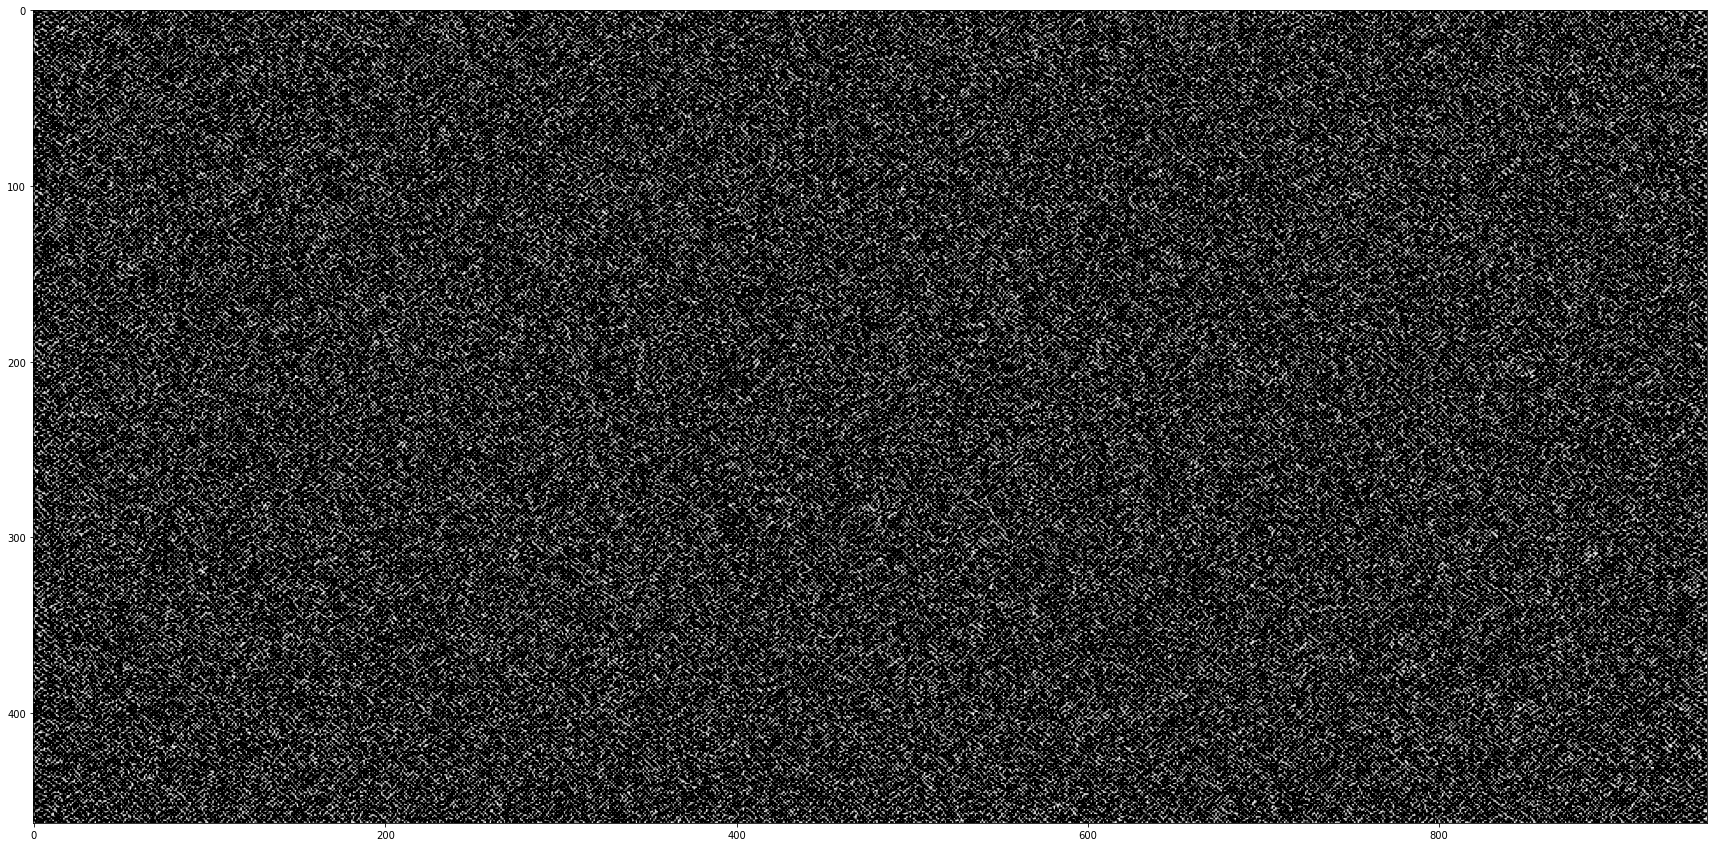

In [8]:
fig, ax = plt.subplots(figsize=(30, 30))
ax.imshow(pres1.angles / np.max(pres1.angles), cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()

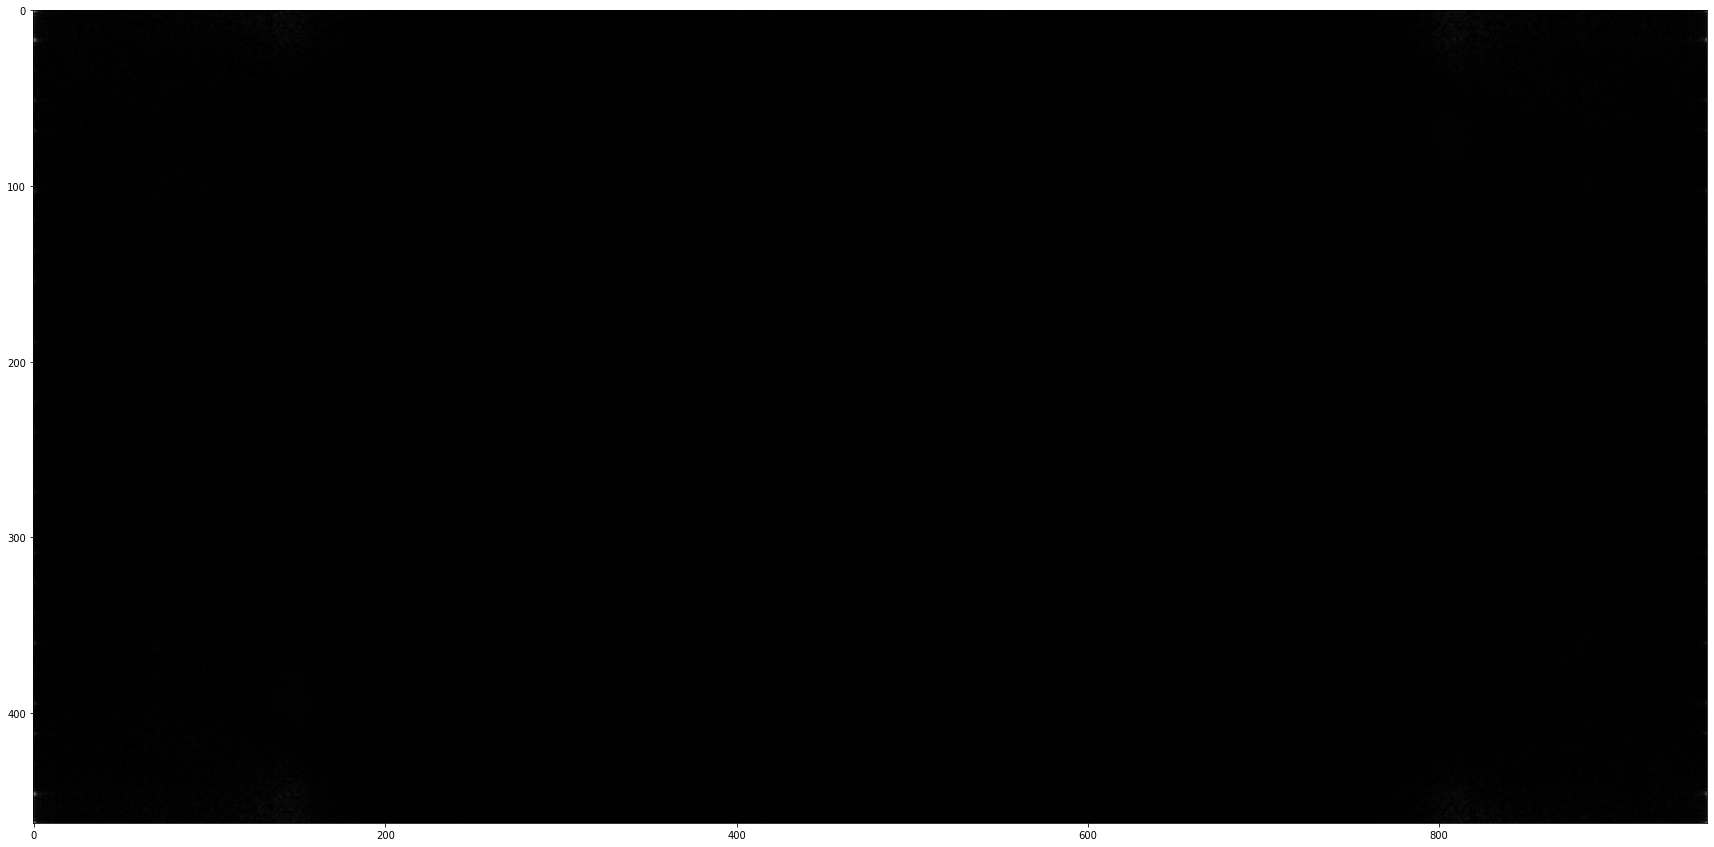

In [9]:
fig, ax = plt.subplots(figsize=(30, 30))
ax.imshow(pres1.absolute_value / np.max(pres1.absolute_value), cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

def plot_correlation(C):
	x = np.arange(0, C.shape[1], 1)
	y = np.arange(0, C.shape[0], 1)

	xs, ys = np.meshgrid(x, y)
	zs = C

	fig = plt.figure()
	ax = Axes3D(fig)
	ax.plot_surface(xs, ys, zs, rstride=1, cstride=1, cmap='hot')
	plt.show()

d:\studia\semestr4\mownit\venv\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  del sys.path[0]


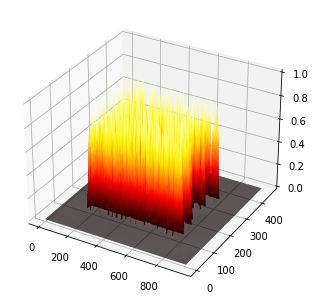

In [11]:
plot_correlation(pres1.correlation)

In [12]:
print('Liczba wystapien:', np.sum(pres1.correlation > 0.90))

Liczba wystapien: 43


### RYBY

In [13]:
pres2 = find_pattern('data/Lab9_school.jpg', 'data/Lab9_fish1.png')

d:\studia\semestr4\mownit\venv\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  del sys.path[0]


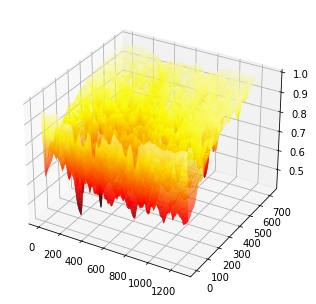

In [14]:
plot_correlation(pres2.correlation)

In [15]:
print('Liczba wystapien:', np.sum(pres2.correlation > 0.6 * np.max(pres2.correlation)))

Liczba wystapien: 915256


d:\studia\semestr4\mownit\venv\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  del sys.path[0]


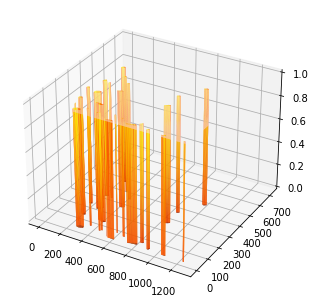

In [16]:
plot_correlation(pres2.correlation > 0.6*np.max(pres2.correlation))

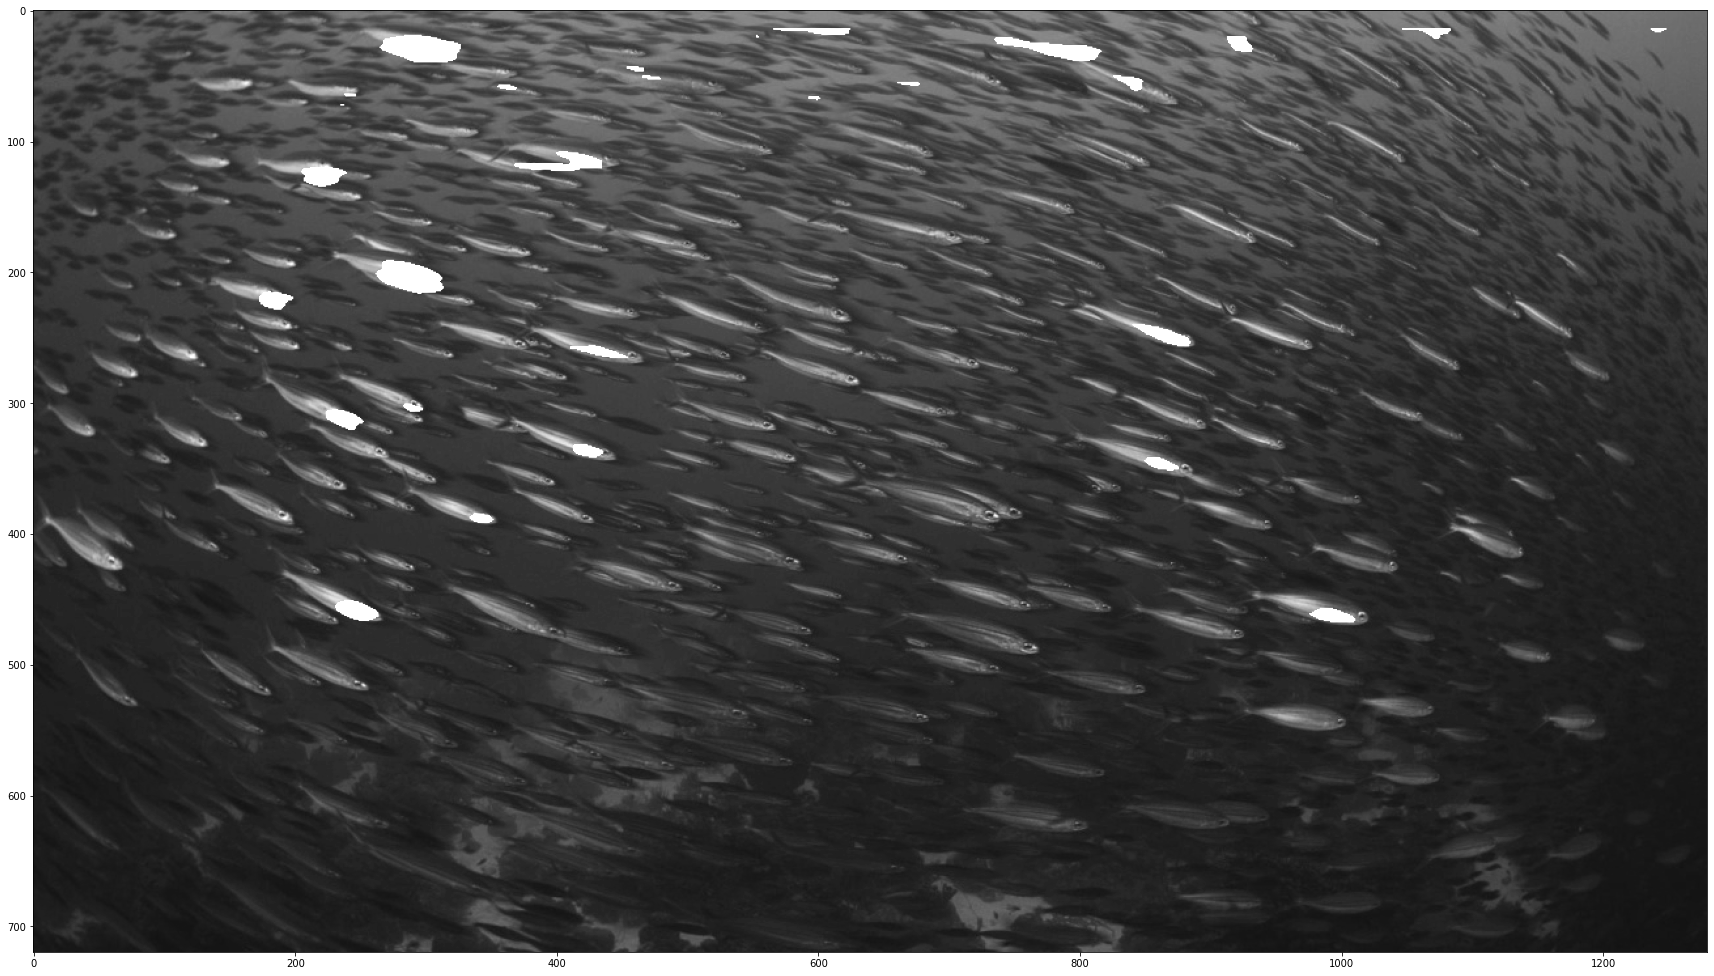

In [17]:
fig, ax = plt.subplots(figsize=(30, 30))

ax.imshow(pres2.gray_image + (pres2.correlation <  0.6*np.max(pres2.correlation)) * np.max(pres2.correlation), cmap=plt.get_cmap('gray'), vmin=0, vmax=np.max(pres2.gray_image))
# ax.imshow(C2 / np.max(C2), cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()